In [26]:
import pandas as pd
import numpy as np

np.random.seed(100)
df = pd.DataFrame({
    'date':pd.date_range('2020-1-1', periods = 10, freq = 'D'),
    'y1':np.random.randint(50, 151, size = 10),
    'y2':np.random.randint(60, 201, size = 10),
})
df

,date,y1,y2
0,2020-01-01,58,113
1,2020-01-02,74,126
2,2020-01-03,117,74
3,2020-01-04,137,94
4,2020-01-05,129,84
5,2020-01-06,98,167
6,2020-01-07,60,120
7,2020-01-08,144,118
8,2020-01-09,102,197
9,2020-01-10,148,153


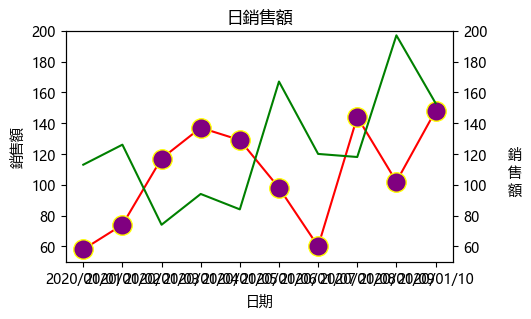

In [29]:
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['font.family'] = 'Microsoft Yahei'
ax = df['y1'].plot(#x = 'date',
        #y = 'y1', 
        figsize = (5, 3),  #圖形大小
        marker = 'o',      #數值資料形狀
        color = 'red',     #線條顏色
        xlabel = '日期',   #X軸標題
        ylabel = '銷售額', #Y軸標題
        title = '日銷售額', #圖形標題
        #xlim = (dt.datetime(2020, 1, 1), dt.datetime(2020, 1, 15)),#X軸刻度範圍
        ylim = (50, 200),   #Y軸刻度範圍\
        markerfacecolor = 'purple', #marker內部填充顏色(簡寫mfc='purple')
        markersize = 14, #marker 尺寸(簡寫ms=14)
        markeredgecolor = 'yellow' #marker border color(簡寫mec)
        #kind = 'bar'
       )

df['y2'].plot(#x = 'date',
        #y = 'y2',
        figsize = (5, 3),
        #marker = '^',      #數值資料形狀
        color = 'green',
        ylim = (50, 200),   #Y軸刻度範圍
        secondary_y = True,
        ax = ax)

datalist = list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date']))
plt.xticks(range(len(df.index)),datalist, rotation = 30)
plt.ylabel('銷\n售\n額', rotation = 0, labelpad = 20) #y軸垂直排列

#把圖片存起來
#plt.savefig('日銷售額.png',format = 'png') #圖檔下方被切割了
plt.savefig('日銷售額.png',format = 'png',bbox_inches = 'tight') #圖檔不會被切割

In [22]:
df['date'].apply(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"))

0    2020/01/01
1    2020/01/02
2    2020/01/03
3    2020/01/04
4    2020/01/05
5    2020/01/06
6    2020/01/07
7    2020/01/08
8    2020/01/09
9    2020/01/10
Name: date, dtype: object

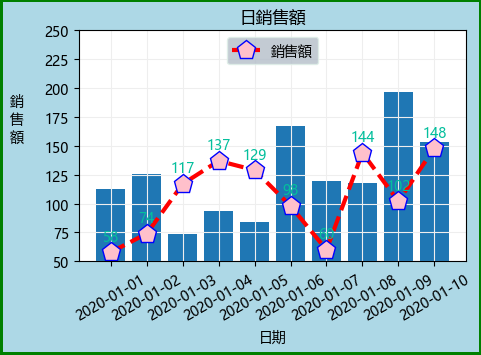

In [84]:
#繪圖函式庫
import matplotlib.pyplot as plt

np.random.seed(100)
df = pd.DataFrame({
    'date':pd.date_range('2020-1-1', periods = 10, freq = 'D'),
    'y1':np.random.randint(50, 151, size = 10),
    'y2':np.random.randint(60, 201, size = 10),
})
#plt.plot(x = df['date'], y = df['y1']) 不行這樣寫
plt.figure(figsize = (5,3),
           facecolor = 'lightblue',
           edgecolor = 'g',
           linewidth = 3
          )
#修改繪圖區顏色後 再疊加marker
axes = plt.axes()
axes.set_facecolor = '#159A9C'


plt.plot(df['date'],#自動指定進xy
         df['y1'],
         c = 'r', #c=color, r=red, green=g, blue=b, black=k
         lw = 3, #linewidth
         ls = '--', #linestyle虛線
         marker = 'p', #marker只能在折線圖上使用
         ms = 14,
         mfc = 'pink',
         mec = 'b'
        ) 

#長條圖
plt.bar(df['date'],
       height = df['y2'])

plt.xticks(rotation = 30)
plt.xlabel('日期')
plt.ylabel('銷\n售\n額',rotation = 0, labelpad = 20)
plt.title('日銷售額')
plt.legend(['銷售額'], loc = 9, facecolor = '#B4BEC9', edgecolor = '#DEEFE7')#legend一定要加入[] loc有0-9個位置
plt.ylim(50,250) # y軸range
plt.grid(True, color = '#eeeeee',) #格線設定

#marker旁邊的顏色
for x,y in zip(df['date'],df['y1']): #zip: 一個表格中有兩個col資料要輸出時，用zip
    text = '{}'.format(y)
    plt.text(x,y+10,text,color = '#04BF9D', ha = 'center') #y+10往上移

plt.savefig('日銷售額2.png',format = 'png',bbox_inches = 'tight')

In [32]:
def add(a,b,c):
    d = a + b + c
    print(d)
add(1,3,5)

9


In [36]:
add(a = 1,b = 3, c = 5)

9


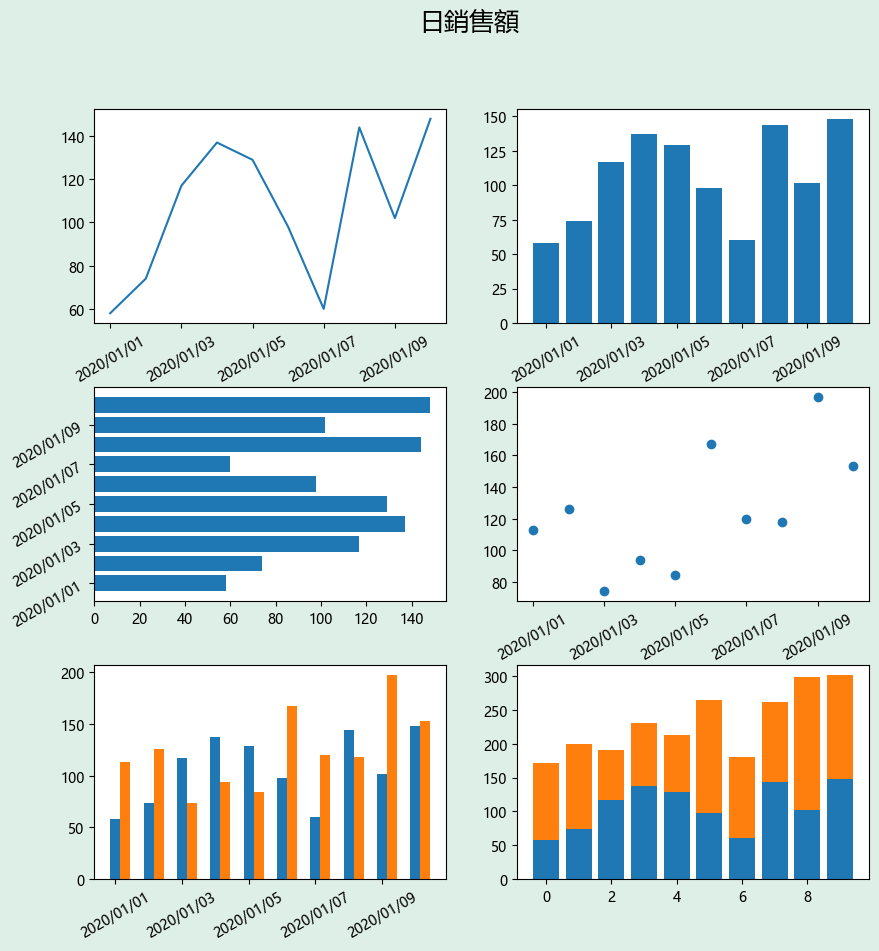

In [132]:
import matplotlib.pyplot as plt

np.random.seed(100)
df = pd.DataFrame({
    'date':pd.date_range('2020-1-1', periods = 10, freq = 'D'),
    'y1':np.random.randint(50, 151, size = 10),
    'y2':np.random.randint(60, 201, size = 10),
})

plt.figure(figsize = (10,10),
          facecolor = '#DEEFE7')
plt.subplot(321)#(幾個row,幾個col,index)
plt.plot(df['y1'])
plt.xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)

#編號2的位置加入長條圖
plt.subplot(322)
plt.bar(df.index, height = df['y1'])
plt.xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)

plt.subplot(323)
plt.barh(df.index, width = df['y1'])
plt.yticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)

plt.subplot(324)
plt.scatter(df.index, df['y2'])
plt.xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)


#群組長條圖
plt.subplot(325)
width = 0.3 #長條圖bar的寬
plt.bar(df.index, width = width, height = df['y1'])
plt.bar(df.index+width, width = width, height = df['y2'])
plt.xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)

#堆疊長條圖
plt.subplot(326)
plt.bar(df.index, height = df['y1'])
plt.bar(df.index, height = df['y2'],bottom = df['y1'].tolist())




plt.suptitle('日銷售額',fontsize = 18)
#X軸被蓋住了 調整hspace
plt.subplots_adjust(hspace = 0.3)

In [102]:
list(range(10))[::2]

[0, 2, 4, 6, 8]

In [103]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

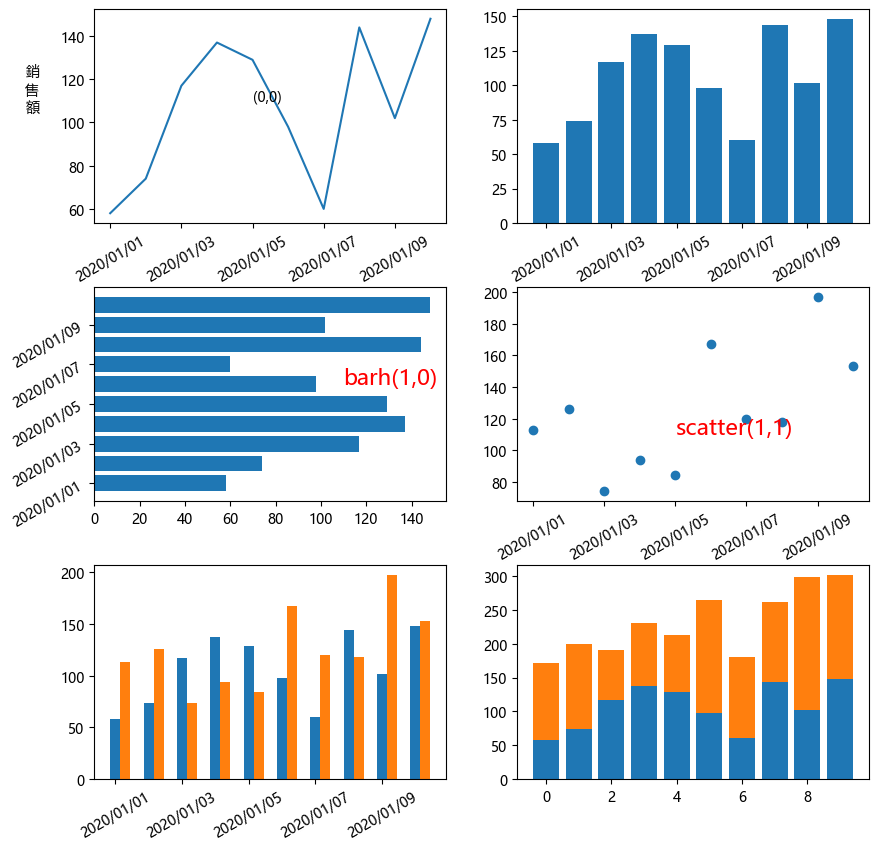

In [158]:
import matplotlib.pyplot as plt

np.random.seed(100)
df = pd.DataFrame({
    'date':pd.date_range('2020-1-1', periods = 10, freq = 'D'),
    'y1':np.random.randint(50, 151, size = 10),
    'y2':np.random.randint(60, 201, size = 10),
})

#另一種建立子圖的方式: 一次建立一堆子圖!
fig, ax = plt.subplots(3,2,figsize = (10,10))
#使用ax就不用matlab，使用物件語法，兩者可混用但會搞不清楚

#第一張圖
ax[0,0].plot(df.index, df['y1'])
ax[0,0].set_xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)
ax[0,0].text(4,110, '(0,0)')

ax[0,1].bar(df.index, height = df['y1'])
ax[0,1].set_xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)

#不用依照順序也能改[0,0]的圖
ax[0,0].set_ylabel('銷\n售\n額',rotation = 0, labelpad = 20)



ax[1,0].barh(df.index, width = df['y1'])
ax[1,0].set_yticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)
ax[1,0].text(110,5, 'barh(1,0)',fontsize = 16, color = 'red')


ax[1,1].scatter(df.index, df['y2'])
ax[1,1].set_xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)
ax[1,1].text(4,110, 'scatter(1,1)',fontsize = 16, color = 'red')

width = 0.3 #長條圖bar的寬
ax[2,0].bar(df.index, width = width, height = df['y1'])
ax[2,0].bar(df.index+width, width = width, height = df['y2'])
ax[2,0].set_xticks(range(0,len(df.index),2),
           list(map(lambda x: dt.datetime.strftime(x, "%Y/%m/%d"),df['date'][::2])),
           rotation = 30)

ax[2][1].bar(df.index, height = df['y1'])
ax[2][1].bar(df.index, height = df['y2'],bottom = df['y1'].tolist())

#X軸被蓋住了 調整hspace
plt.subplots_adjust(hspace = 0.3)

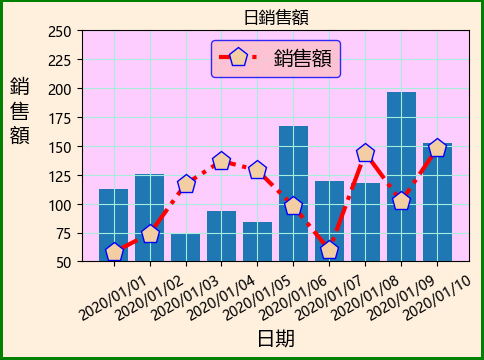

In [175]:
#改用物件寫法
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

np.random.seed(100)
df = pd.DataFrame({
    'date':pd.date_range('2020-1-1', periods = 10, freq = 'D'),
    'y1':np.random.randint(50, 151, size = 10),
    'y2':np.random.randint(60, 201, size = 10),
})

fig, ax = plt.subplots(figsize = (5, 3))
fig.set_facecolor('#fff0de')
fig.set_edgecolor('g')
fig.set_linewidth(3)
#plt.figure(figsize = (5, 3),
#           facecolor = '#fff0de',
#           edgecolor = 'g',
#           linewidth = 3)

#axes = plt.axes()
ax.set_facecolor('#fecdff')

ax.plot(df.index,
         df['y1'], 
         #color = 'red',
         #c = 'red'
         c = 'r', #red=> r, green => g, blue => b, black => k
         #linewidth = 3,
         lw = 3,
         #linestyle = '--',
         ls = '-.',
         marker = 'p',
         #markersize = 14
         ms = 14,
         #markerfacecolor = '#f3cea3',
         mfc = '#f3cea3',
         #markeredgecolor = 'b',
         mec = 'b'
         ) #繪製折線圖


#長條圖
ax.bar(df.index,
        height = df['y2'])

ax.set_xticks(
range(len(df.index)),
list(map(lambda x :dt.datetime.strftime(x, "%Y/%m/%d"),df['date'])),
rotation = 30) #X軸刻度文字

ax.set_xlabel('日期',fontsize = 14) #X軸標題
ax.set_ylabel('銷\n售\n額', rotation = 0, labelpad = 20,fontsize = 14) #Y軸標題
ax.set_title('日銷售額') #圖表標題
ax.legend(['銷售額'], 
           loc = 9, 
           facecolor = 'pink',
           edgecolor = 'b',
         fontsize = 14) #圖例設定
ax.set_ylim(50, 250) #Y軸範圍
ax.grid(True, color = '#a4eede') # 格線設定

#for x, y in zip(df.index, df['y1']):
#    text = '{}'.format(y)
#    ax.annotate(x, y+13, text, color = 'r', ha = 'center')

plt.savefig('日銷售額.png',
            #format = 'png',
            #bbox_inches = 'tight',
            dpi = 200)

In [178]:
import os
import pandas as pd
from io import StringIO

filepath = r'C:\Users\wendy.c\Desktop\python\資料清單'
data = []
for root, dirs, files in os.walk(filepath):
    print('root:', root)
    print('dirs:', dirs)
    print('files:', files)# 顯示檔案列表
    for file in files:
        with open('{}\{}'.format(root,file)) as f:
            l = list(map(lambda x:x.replace(',\n',''), f.readlines()))
        df0 = pd.read_csv(StringIO('\n'.join(l)), index_col = ['日期'])
        data.append(df0)
df = pd.concat(data)
df

root: C:\Users\wendy.c\Desktop\python\資料清單
dirs: ['.ipynb_checkpoints']
files: ['20230101_20230131.csv', '20230201_20230228.csv', '20230301_20230331.csv', '20230401_20230430.csv', '20230501_20230531.csv', '20230601_20230630.csv', '20230701_20230731.csv', '20230801_20230831.csv', '20230901_20230930.csv', '20231001_20231031.csv', '20231101_20231130.csv', '20231201_20231231.csv']
root: C:\Users\wendy.c\Desktop\python\資料清單\.ipynb_checkpoints
dirs: []
files: []


,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
日期,,,,,,
2023/01/31,273744,330999,82.70,138214,170220,81.20
2023/01/30,349525,410532,85.14,89495,87502,102.28
2023/01/17,142037,147777,96.12,200645,191808,104.61
2023/01/16,195256,200493,97.39,189684,180133,105.30
2023/01/13,261440,305050,85.70,176152,175608,100.31
...,...,...,...,...,...,...
2023/12/07,233178,245931,94.81,251000,245158,102.38
2023/12/06,546188,524605,104.11,209699,200447,104.62
2023/12/05,402115,452693,88.83,316027,302112,104.61


In [181]:
def setcolor(x):
    if x >= 120:
        return 'background-color:#002333;color:white'
    if x <= 80:
        return 'background-color:#159A9C;color:white'
(df
.reset_index()
.style
.applymap(setcolor, subset = ['買賣權未平倉量比率%', '買賣權成交量比率%']))

C:\Users\wendy.c\AppData\Local\Temp\ipykernel_17148\2668605304.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(setcolor, subset = ['買賣權未平倉量比率%', '買賣權成交量比率%']))


,日期,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
0,2023/01/31,273744,330999,82.700000,138214,170220,81.200000
1,2023/01/30,349525,410532,85.140000,89495,87502,102.280000
2,2023/01/17,142037,147777,96.120000,200645,191808,104.610000
3,2023/01/16,195256,200493,97.390000,189684,180133,105.300000
4,2023/01/13,261440,305050,85.700000,176152,175608,100.310000
5,2023/01/12,147592,164753,89.580000,161427,160363,100.660000
6,2023/01/11,553048,555559,99.550000,142750,131979,108.160000
7,2023/01/10,479056,469606,102.010000,301387,227327,132.580000
8,2023/01/09,596922,484056,123.320000,276672,193739,142.810000
9,2023/01/06,285047,262552,108.570000,214223,197219,108.620000


In [185]:
df = df.sort_index()
df #覆寫
#df.sort_values()

,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
日期,,,,,,
2023/01/03,493351,496771,99.31,222208,207378,107.15
2023/01/04,563562,559566,100.71,135015,145210,92.98
2023/01/05,224444,228660,98.16,172712,184092,93.82
2023/01/06,285047,262552,108.57,214223,197219,108.62
2023/01/09,596922,484056,123.32,276672,193739,142.81
...,...,...,...,...,...,...
2023/12/25,232516,186009,125.00,253891,210657,120.52
2023/12/26,265706,194444,136.65,282865,209606,134.95
2023/12/27,394078,404830,97.34,165374,136709,120.97


In [187]:
#抓前100筆
df.tail(100)

,賣權成交量,買權成交量,買賣權成交量比率%,賣權未平倉量,買權未平倉量,買賣權未平倉量比率%
日期,,,,,,
2023/08/10,363886,410131,88.72,185983,248670,74.79
2023/08/11,382062,403021,94.80,213757,268355,79.65
2023/08/14,441236,581651,75.86,220698,325724,67.76
2023/08/15,427970,429508,99.64,243921,335781,72.64
2023/08/16,639781,633863,100.93,91296,123251,74.07
...,...,...,...,...,...,...
2023/12/25,232516,186009,125.00,253891,210657,120.52
2023/12/26,265706,194444,136.65,282865,209606,134.95
2023/12/27,394078,404830,97.34,165374,136709,120.97


TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

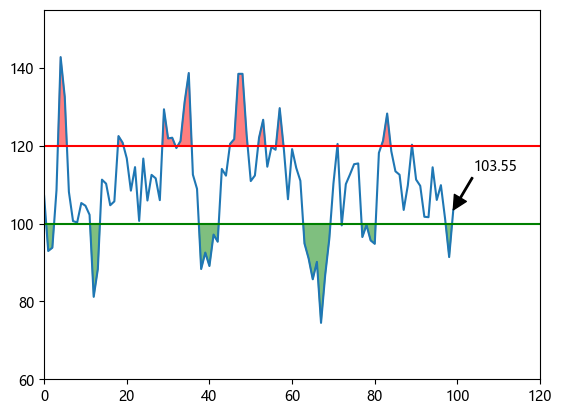

In [222]:
import matplotlib.pyplot as plt
df1 = df.head(100)
x   = range(len(df1.index))
plt.plot(x, df1['買賣權未平倉量比率%'])
plt.axhline(120, color = 'red')
plt.axhline(100, color = 'green')
plt.fill_between(x,
                 df1['買賣權未平倉量比率%'],
                 120, 
                 where = (df1['買賣權未平倉量比率%'] >= 120),
                 interpolate = True, #把顏色填滿
                 color = 'red',
                 alpha = 0.5)

plt.fill_between(x,
                 df1['買賣權未平倉量比率%'],
                 100, 
                 where = (df1['買賣權未平倉量比率%'] <= 100),
                 interpolate = True, #把顏色填滿
                 color = 'green',
                 alpha = 0.5)
plt.xlim(0, 120)
plt.ylim(60, 155)
lastval = df1['買賣權未平倉量比率%'].iloc[-1]
text = '{}'.format(lastval)
plt.annotate(text, 
             xy = (x[-1], lastval),
             xytext = (x[-1] + 5, lastval + 10),
             arrowprops = {
                 'width':1,
                 'headwidth':10,
                 'headlength':10,
                 'shrink':0,
                 'facecolor':'k'
             })

plt.xticks(x[::10],
list(map(lambda x :dt.datetime.strftime(x, "%Y/%m/%d"),df1.index[::10])),
rotation = 30)